In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats, interpolate
from scipy.interpolate import CubicSpline
from astropy.visualization import hist
from astroML.density_estimation import EmpiricalDistribution
from astroML.datasets import fetch_dr7_quasar
import astropy

In [2]:
astropy.cosmology.Planck15

# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first 10000 points
data = data[:10000]

z = data['redshift']

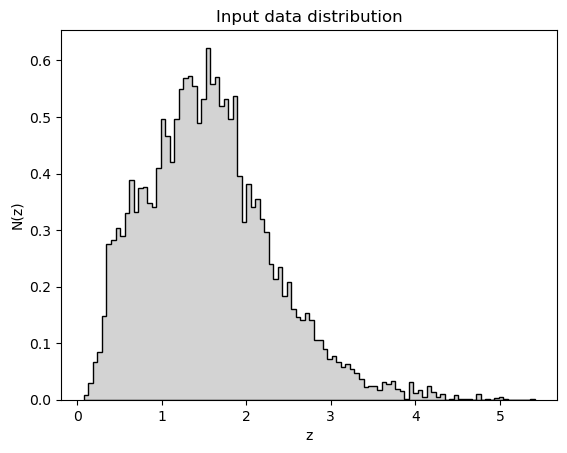

In [51]:
#histogram of the data
plt.hist(z, 100, density = True, ec='black', fc='lightgrey', histtype='stepfilled')
plt.title('Input data distribution')
plt.xlabel('z')
plt.ylabel('N(z)')
plt.show()

## Rejection sampling
puoi farlo anche usando z_dist.pdf(z) da rv_histogram al posto  di cont 

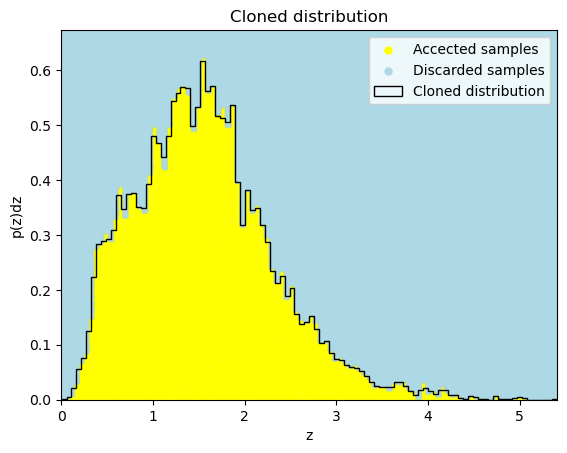

In [61]:
Nclone = 10**6

counts, bins = np.histogram(z, 100, density = True)

x = np.random.uniform(0, max(z), Nclone)
y = np.random.uniform(0, max(counts) + 0.05, Nclone)

ind = np.digitize(x, bins, right=True)

cont = np.zeros(len(ind))
for i in range(len(ind)):   #conteggi in ogni bin del vettore ind (len(cont)=10**7, len(counts)=100)
    cont[i] = counts[ind[i]-1]

plt.scatter(x[y<cont], y[y<cont], c='yellow', s = 0.01, label = 'Accected samples')
plt.scatter(x[y>cont], y[y>cont], c='lightblue', s = 0.01, label = 'Discarded samples')

goodpoints = x[y<cont]
plt.hist(goodpoints, bins=100, density=True, histtype='step', color='black', label = 'Cloned distribution')

plt.xlim(0, max(z))
plt.ylim(0, max(counts) + 0.05)
plt.title('Cloned distribution')
plt.xlabel('z')
plt.ylabel('p(z)dz')
plt.legend(markerscale = 50, loc='upper right')
plt.show()

## Inverse transform sampling

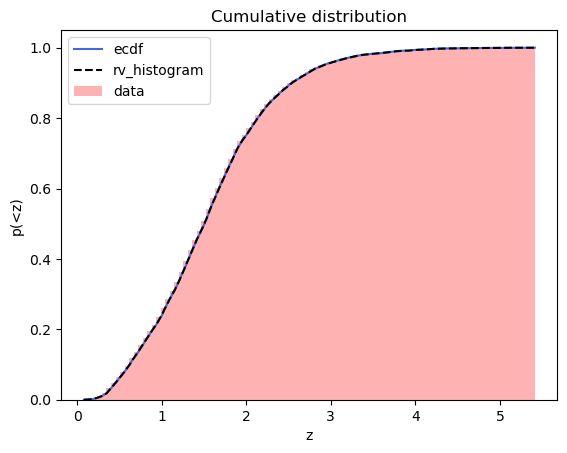

In [25]:
#Computing the cdf using stats.ecdf
cdf_ecdf = stats.ecdf(z)
plt.plot(cdf_ecdf.cdf.quantiles, cdf_ecdf.cdf.probabilities, color='royalblue', label='ecdf')

#Computing the cdf using rv_histogram
dist_z = stats.rv_histogram((counts,bins))
z_linspace = np.linspace(min(z), max(z), 10000)
plt.plot(z_linspace, dist_z.cdf(z_linspace), color = 'black', label = 'rv_histogram', ls='--')

#cdf from the data
plt.hist(z, 100, density = True, cumulative = True, color = 'red', label = 'data', alpha = 0.3)
plt.title('Cumulative distribution')
plt.ylabel('p(<z)')
plt.xlabel('z')
plt.legend()
plt.show()

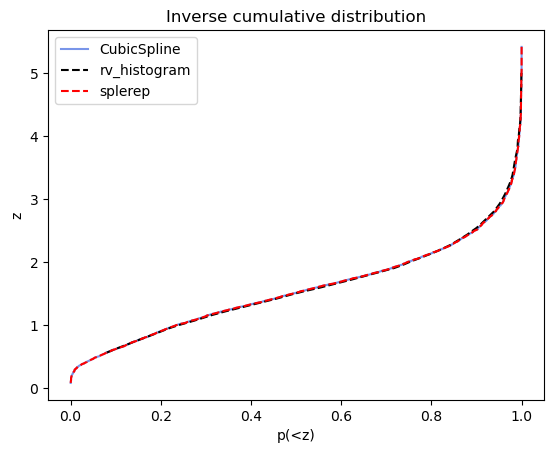

In [26]:
#interpolation of the inverse cumulative distribution
u = np.random.uniform(0, 1, 10000)
u.sort()

#interpolation with CubicSpline
cs = CubicSpline(u, z) 
plt.plot(u, cs(u), label = "CubicSpline", color='royalblue', alpha = 0.7)

#interpolation with rv_histogram
plt.plot(z_linspace, dist_z.ppf(z_linspace), color = 'black', label = 'rv_histogram', ls='--')

#interpolation with splrep/splev
splerp = interpolate.splrep(u, z) 
plt.plot(u, interpolate.splev(u, splerp), color = 'red', label = 'splerep', ls='--')

plt.title('Inverse cumulative distribution')
plt.xlabel('p(<z)')
plt.ylabel('z')
plt.legend()
plt.show()

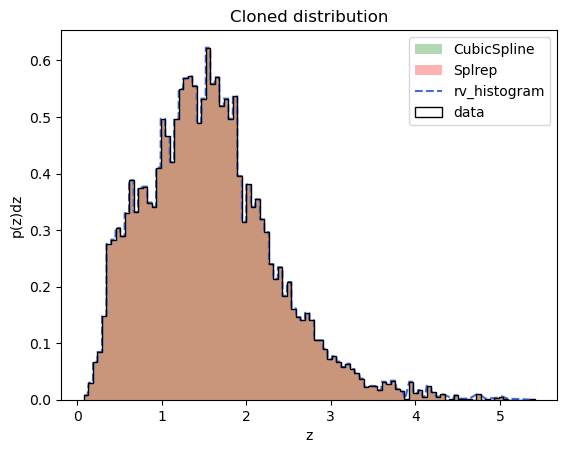

In [36]:
#cloning the distribution using CubicSpline
plt.hist(cs(u), density=True, bins=100, label = 'CubicSpline', color = 'green', alpha = 0.3)

#cloning the distribution using CubicSpline splrep/splev
plt.hist(interpolate.splev(u, splerp), density=True, bins=100, label = 'Splrep', color = 'red', alpha = 0.3)

#pdf with rv_histogram
plt.plot(z, dist_z.pdf(z), label = 'rv_histogram', color = 'royalblue', ls='--')

#pdf of the data
plt.hist(z, bins=100, density=True, histtype='step', color='black', label = 'data')

plt.title('Cloned distribution')
plt.xlabel('z')
plt.ylabel('p(z)dz')
plt.legend()
plt.show()

# Manca la parte teorica e anche il quantitative check